## Arewa Data Science Academy
### Deep Learning Cohort2.0

#### Name: Yahya Abdurrazaq
#### Email: yahyarimi01@gmail.com
#### Title: Week 2 Solutio

### **1. Create a straight line dataset using the linear regression formula (weight * X + bias).**

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.13.1+cpu'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
#Create weight and bias
weight = 0.3
bias = 0.9

#Create range values
start = 0
step = 0.01
end = 1

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 
X[:10], y[:10]

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    #plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    #plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
    
    if predictions is not None:
        #Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    #Show legend
    plt.legend(prop={"size": 14});

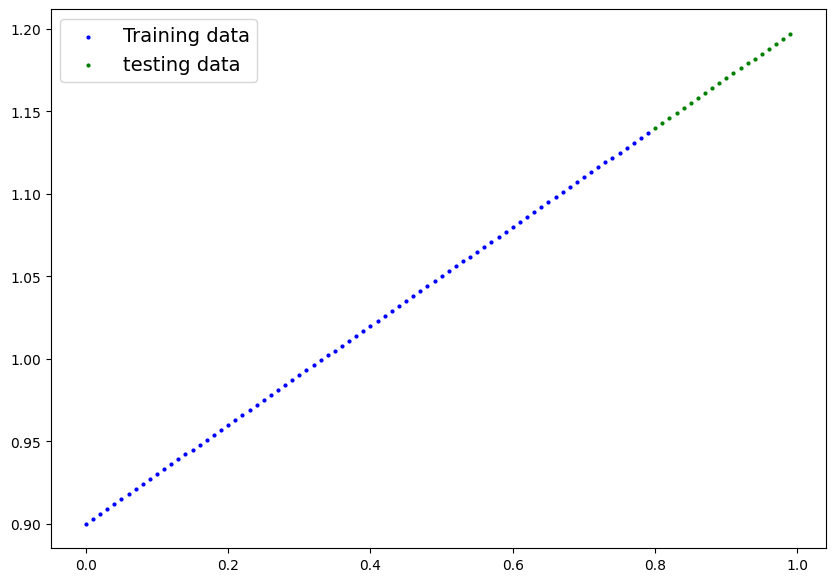

In [6]:
plot_predictions(X_train, y_train, X_test, y_test)

### **2. Build a PyTorch model by subclassing nn.Module.**

In [7]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                    requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.0809])), ('bias', tensor([-1.4677]))])

In [9]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [10]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

### **3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.**

In [11]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

In [12]:
#Training Loop

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training

    # Put model in training mode
    model_0.train()

    # 1. Forward pass 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode and setup inference context
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Caculate test loss
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 20 == 0:
            print(f"Epoch: {epoch} | Train Loss: {loss:.3f} | Test Loss: {test_loss:.3f} ")

Epoch: 0 | Train Loss: 2.454 | Test Loss: 2.550 
Epoch: 20 | Train Loss: 2.223 | Test Loss: 2.279 
Epoch: 40 | Train Loss: 1.992 | Test Loss: 2.009 
Epoch: 60 | Train Loss: 1.761 | Test Loss: 1.738 
Epoch: 80 | Train Loss: 1.529 | Test Loss: 1.467 
Epoch: 100 | Train Loss: 1.298 | Test Loss: 1.197 
Epoch: 120 | Train Loss: 1.067 | Test Loss: 0.926 
Epoch: 140 | Train Loss: 0.836 | Test Loss: 0.655 
Epoch: 160 | Train Loss: 0.605 | Test Loss: 0.385 
Epoch: 180 | Train Loss: 0.373 | Test Loss: 0.114 
Epoch: 200 | Train Loss: 0.166 | Test Loss: 0.135 
Epoch: 220 | Train Loss: 0.122 | Test Loss: 0.223 
Epoch: 240 | Train Loss: 0.111 | Test Loss: 0.242 
Epoch: 260 | Train Loss: 0.104 | Test Loss: 0.237 
Epoch: 280 | Train Loss: 0.097 | Test Loss: 0.224 


### **4. Make predictions with the trained model on the test data.**

In [13]:
# Turn model into evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[1.3067],
        [1.3142],
        [1.3217],
        [1.3292],
        [1.3367],
        [1.3442],
        [1.3516],
        [1.3591],
        [1.3666],
        [1.3741],
        [1.3816],
        [1.3891],
        [1.3965],
        [1.4040],
        [1.4115],
        [1.4190],
        [1.4265],
        [1.4340],
        [1.4414],
        [1.4489]])

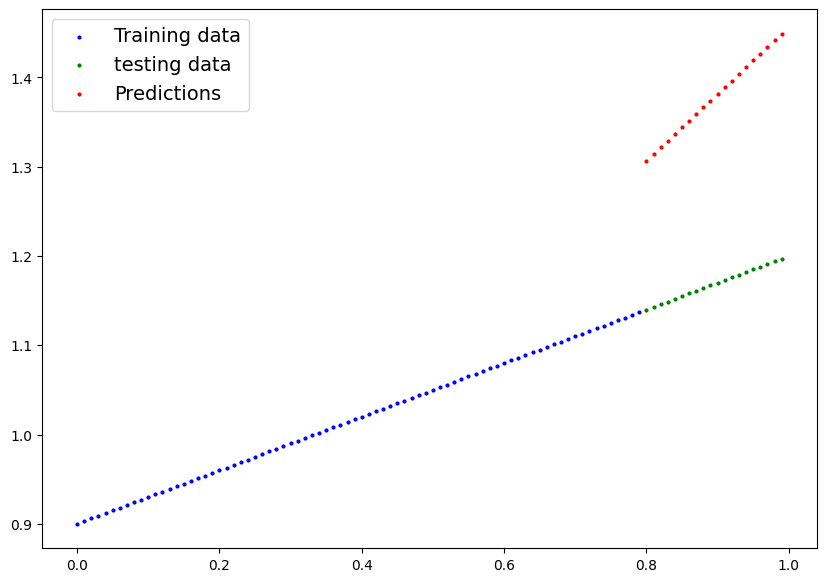

In [14]:
# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

### **5. Save your trained model's state_dict() to file.**

In [15]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_1_exercise.pth


In [16]:
# Instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_0.to(device)

print(f"Loaded model:\n{loaded_model_0}")
print(f"Model on device:\n{next(loaded_model_0.parameters()).device}")

Loaded model:
LinearRegressionModel()
Model on device:
cpu


In [17]:
# Evaluate loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_test)
y_preds == loaded_model_0_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

SUBMIT ASSIGNMENT HERE: [CLICK ME ▶️](https://forms.gle/876vi4aNoFf4A2mU7)